<a href="https://colab.research.google.com/github/JamesBarciz/DS-Unit-2-Kaggle-Challenge/blob/master/module2/James_Barciz_assignment_kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
train, val = train_test_split(train, random_state=42)
print(train.shape, val.shape, test.shape)

(44550, 41) (14850, 41) (14358, 40)


In [0]:
import numpy as np

def mass_wrangle(train, val, test):

    train = train.copy()
    train['latitude'] = train['latitude'].replace(-2e-08)
    train = train.drop(columns='quantity_group')

    val = val.copy()
    val['latitude'] = val['latitude'].replace(-2e-08)
    val = val.drop(columns='quantity_group')

    test = test.copy()
    test['latitude'] = test['latitude'].replace(-2e-08)
    test = test.drop(columns='quantity_group')

    cols_with_zeros = ['longitude', 'latitude']
    
    for col in cols_with_zeros:
      train[col] = train[col].replace(0, np.nan)
      val[col] = val[col].replace(0, np.nan)
      test[col] = test[col].replace(0, np.nan)
    
    target = 'status_group'
   
    X_train = train.drop(columns=target)
    y_train = train[target]
    X_val = val.drop(columns=target)
    y_val = val[target]
    X_test = test

    return X_train, y_train, X_val, y_val, X_test

In [0]:
X_train, y_train, X_val, y_val, X_test = mass_wrangle(train, val, test)

In [6]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape) 

(44550, 39) (44550,) (14850, 39) (14850,) (14358, 39)


In [7]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True, cols=['basin']),
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8083501683501684


In [8]:
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
encoded.shape

(44550, 47)

In [9]:
encoded.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin_Wami / Ruvu,basin_Lake Victoria,basin_Internal,basin_Lake Nyasa,basin_Pangani,basin_Lake Tanganyika,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Lake Rukwa,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
24947,33935,20.0,2011-03-08,Government Of Tanzania,330,Ce,38.123839,-6.087137,Ccm,0,1,0,0,0,0,0,0,0,0,Kilangawageni,Pwani,6,1,Bagamoyo,Mbwewe,80,True,GeoData Consultants Ltd,VWC,Kwaruhombo wa,True,1972,ksb,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
22630,49654,0.0,2013-02-16,Dwsp,0,DWE,NaN,-6.087137,Mwamahonza,0,0,1,0,0,0,0,0,0,0,Mwamahala,Mwanza,17,1,Magu,Nkungulu,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump
13789,39287,0.0,2011-08-13,Dasip,0,DASIP,33.312321,-2.814100,Chanongu,0,0,1,0,0,0,0,0,0,0,Chanongu,Mwanza,19,4,Kwimba,Wala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump
15697,60510,0.0,2013-01-20,Government Of Tanzania,1542,GOVERNMENT,34.783049,-4.842093,Zahanati,0,0,0,1,0,0,0,0,0,0,Mungumaji,Singida,13,4,Singida Urban,Mungumaji,23,True,GeoData Consultants Ltd,WUA,NaN,True,2010,gravity,gravity,gravity,wua,user-group,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
22613,24259,0.0,2013-09-03,World Bank,523,Government,34.660944,-10.707331,Kwa Mzee Charles,0,0,0,0,1,0,0,0,0,0,Tumba,Ruvuma,10,3,Mbinga,Mbaha,1,NaN,GeoData Consultants Ltd,VWC,Government,True,2013,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,dry,spring,spring,groundwater,communal standpipe,communal standpipe


In [10]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)
importances

id                               0.051451
amount_tsh                       0.018196
date_recorded                    0.036416
funder                           0.031821
gps_height                       0.041584
installer                        0.024125
longitude                        0.071635
latitude                         0.071551
wpt_name                         0.049303
num_private                      0.001076
basin_Wami / Ruvu                0.001834
basin_Lake Victoria              0.002598
basin_Internal                   0.003259
basin_Lake Nyasa                 0.002082
basin_Pangani                    0.001961
basin_Lake Tanganyika            0.002921
basin_Rufiji                     0.002199
basin_Ruvuma / Southern Coast    0.001692
basin_Lake Rukwa                 0.001891
subvillage                       0.047838
region                           0.013335
region_code                      0.013762
district_code                    0.015355
lga                              0

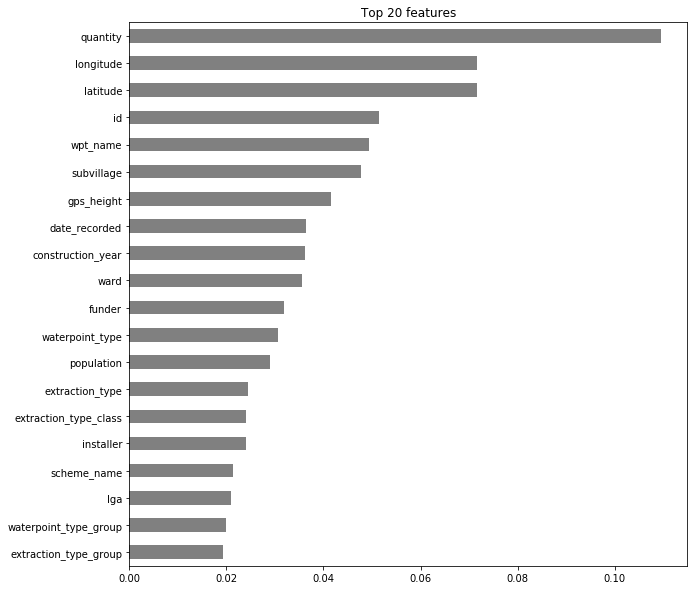

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
X_train = X_train.drop(columns=['id', 'date_recorded'])
X_val = X_val.drop(columns=['id', 'date_recorded'])

In [37]:
# Adjusting params

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True, cols=['basin']),
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=100, max_features=10, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8018855218855219


In [19]:
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
encoded.shape

(44550, 45)

In [0]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)
# Only choosing features that are significant (0.01 or more)
importances = importances[importances>0.01].sort_values()

In [32]:
importances

scheme_management        0.010962
management               0.011606
region                   0.012085
region_code              0.012866
source_type              0.013548
source                   0.013700
district_code            0.015246
payment_type             0.016113
payment                  0.016731
amount_tsh               0.018258
extraction_type_group    0.018885
extraction_type          0.019978
waterpoint_type_group    0.021634
lga                      0.022129
scheme_name              0.022919
extraction_type_class    0.024098
installer                0.024961
population               0.032045
funder                   0.034772
waterpoint_type          0.037634
construction_year        0.038573
ward                     0.041789
gps_height               0.046802
subvillage               0.057170
wpt_name                 0.060181
latitude                 0.085450
longitude                0.087283
quantity                 0.128337
dtype: float64

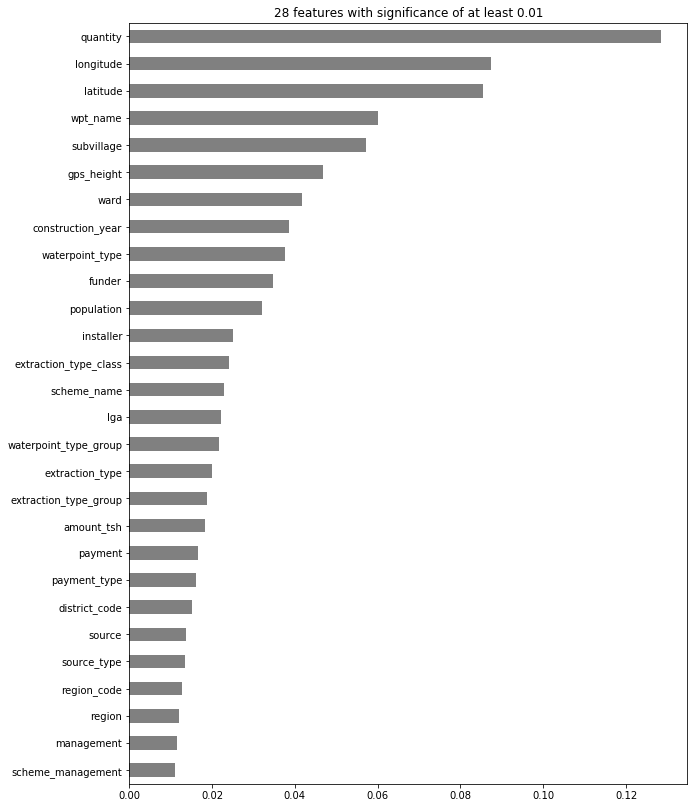

In [34]:
%matplotlib inline

n = importances.count()
plt.figure(figsize=(10, n/2))
plt.title(f'{n} features with significance of at least 0.01')
importances.sort_values()[-n:].plot.barh(color='grey');